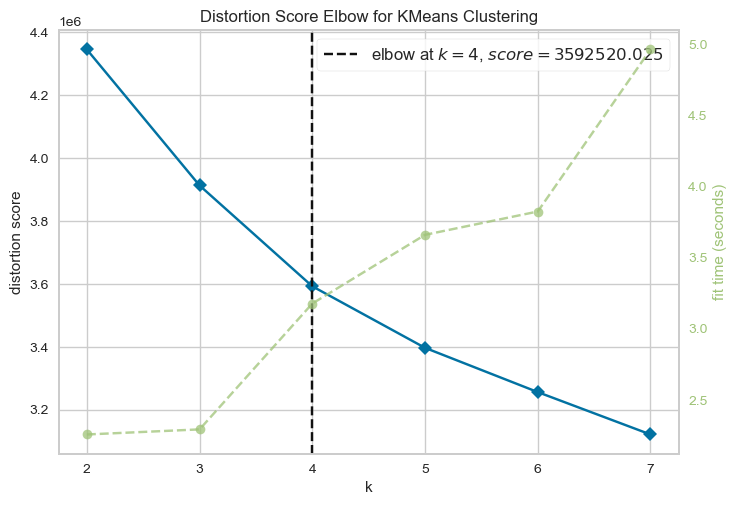


--- Detailed Analysis: Cluster 1 ---
Linear Regression Metrics:
- MAE: 3461.72
- MSE: 21941916.43
- RMSE: 4684.22
- R2 Score: 0.09

Spending Insights:
- Predicted Total Amount Spent: 356,228,389.58
- Actual Total Amount Spent: 355,808,420.00

Product Preferences:
- Category 5: 45831 purchases
- Category 8: 36561 purchases
- Category 1: 22782 purchases


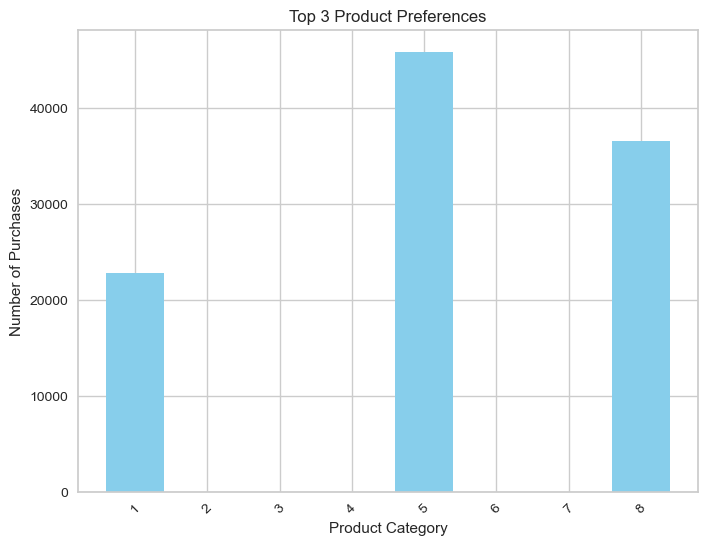


Demographic Distributions:
Age Distribution:
26-35: 48.27%
18-25: 23.30%
36-45: 19.77%
0-17: 3.38%
46-50: 3.30%
51-55: 1.66%
55+: 0.31%

Gender Distribution:
Female: 72.78%
Male: 27.22%

Marital Status Distribution:
Unmarried: 77.43%
Married: 22.57%


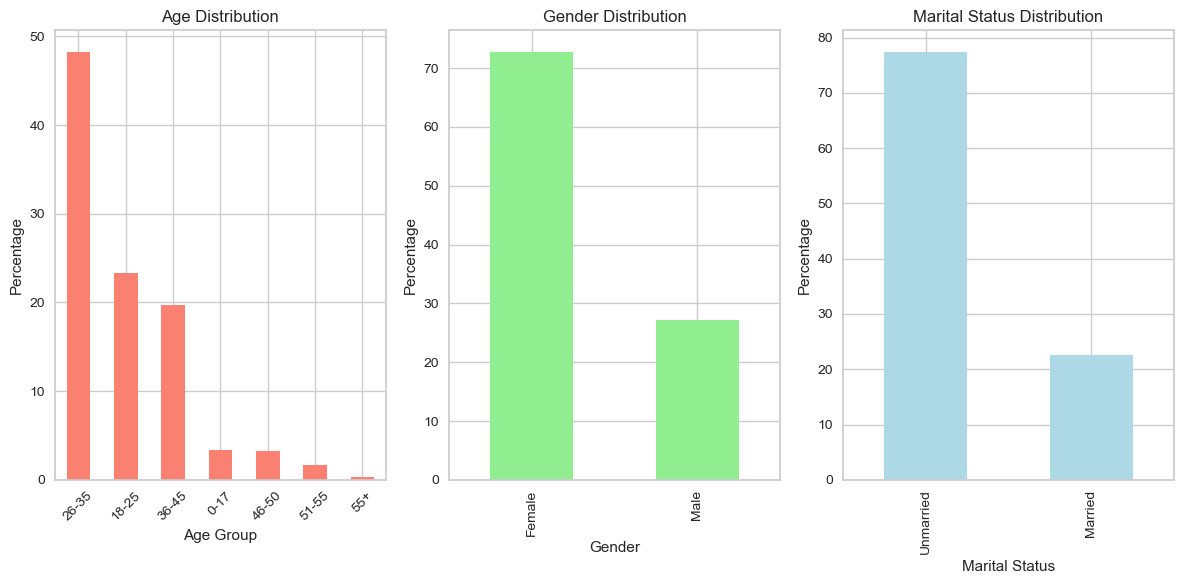

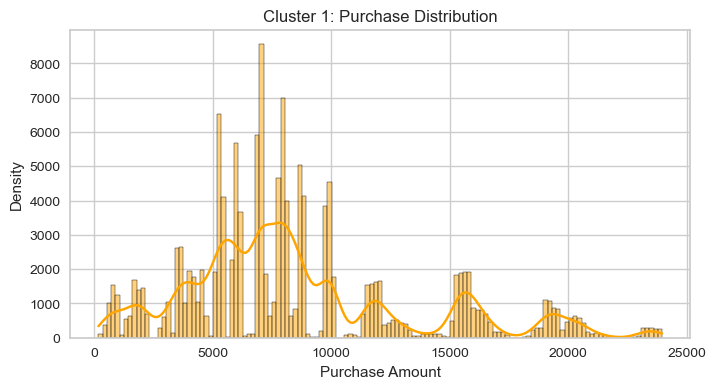


--- Detailed Analysis: Cluster 2 ---
Linear Regression Metrics:
- MAE: 3503.39
- MSE: 21453097.72
- RMSE: 4631.75
- R2 Score: 0.11

Spending Insights:
- Predicted Total Amount Spent: 311,706,514.29
- Actual Total Amount Spent: 309,882,396.00

Product Preferences:
- Category 5: 34813 purchases
- Category 8: 27260 purchases
- Category 1: 21060 purchases


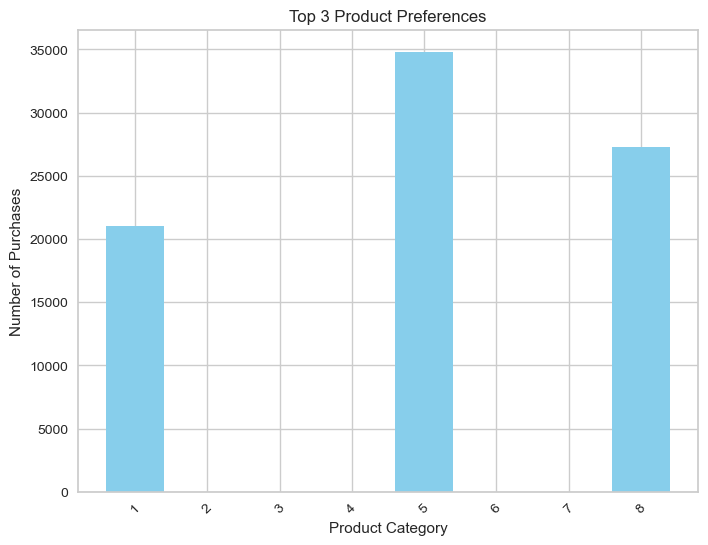


Demographic Distributions:
Age Distribution:
51-55: 26.87%
46-50: 25.34%
36-45: 19.87%
55+: 17.13%
26-35: 10.63%
18-25: 0.16%

Gender Distribution:
Female: 72.20%
Male: 27.80%

Marital Status Distribution:
Married: 90.77%
Unmarried: 9.23%


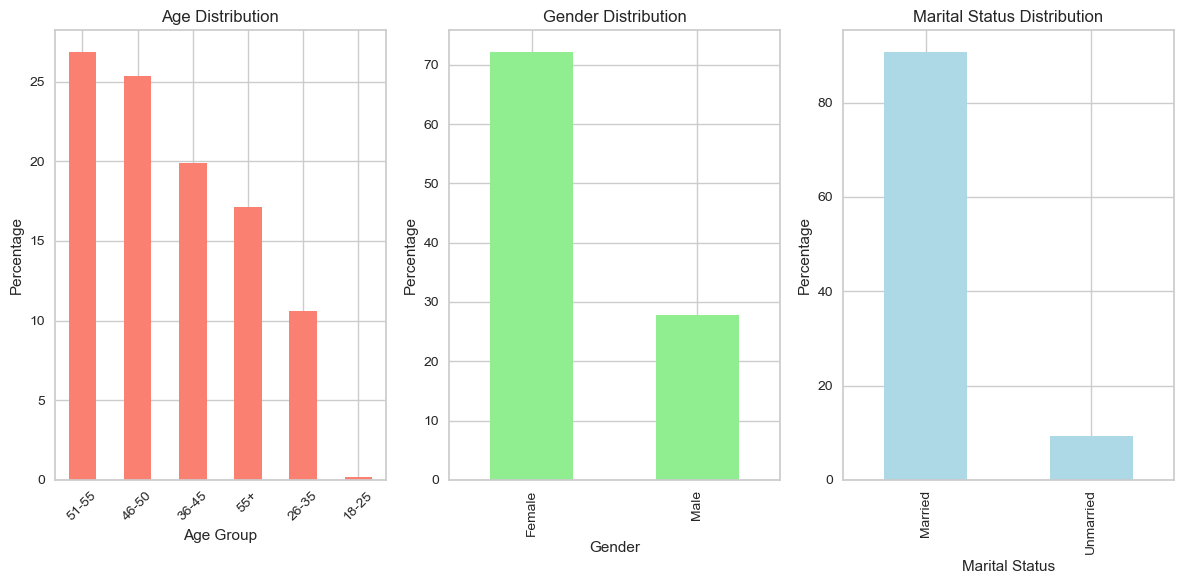

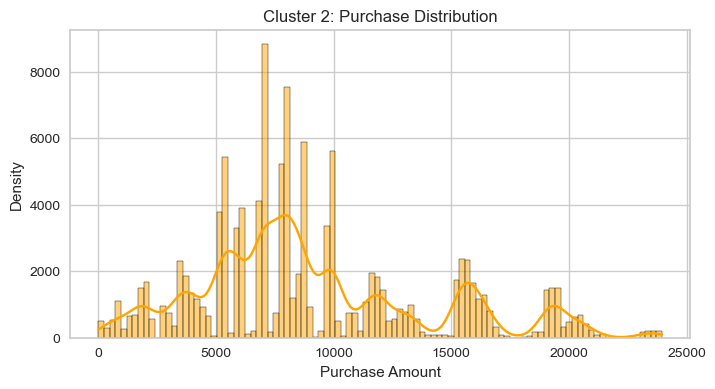


--- Detailed Analysis: Cluster 3 ---
Linear Regression Metrics:
- MAE: 3913.26
- MSE: 22276705.60
- RMSE: 4719.82
- R2 Score: 0.07

Spending Insights:
- Predicted Total Amount Spent: 505,506,902.41
- Actual Total Amount Spent: 503,346,403.00

Product Preferences:
- Category 1: 87390 purchases
- Category 5: 15085 purchases
- Category 2: 14163 purchases


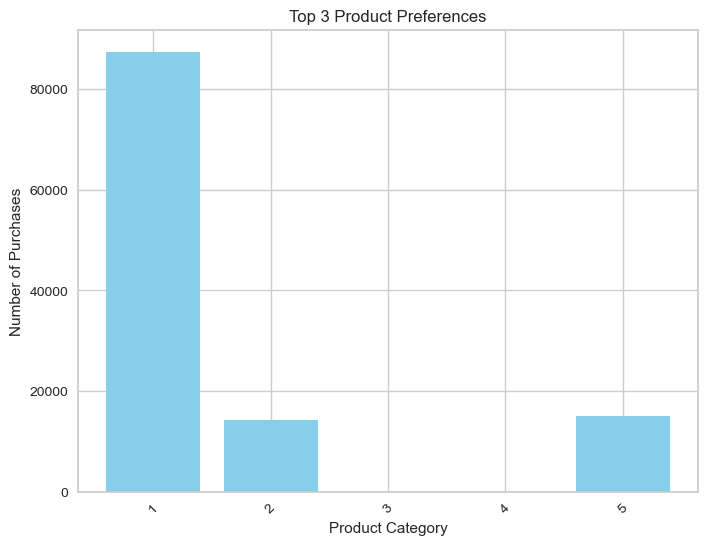


Demographic Distributions:
Age Distribution:
26-35: 46.20%
18-25: 22.27%
36-45: 20.54%
46-50: 4.73%
0-17: 3.41%
51-55: 2.13%
55+: 0.72%

Gender Distribution:
Female: 80.48%
Male: 19.52%

Marital Status Distribution:
Unmarried: 68.33%
Married: 31.67%


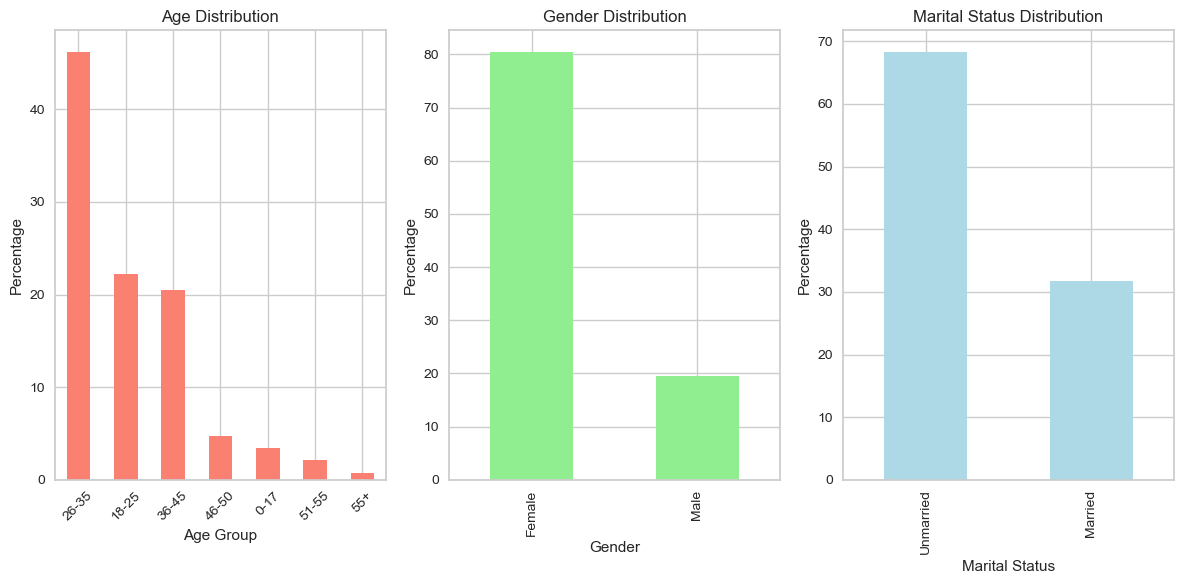

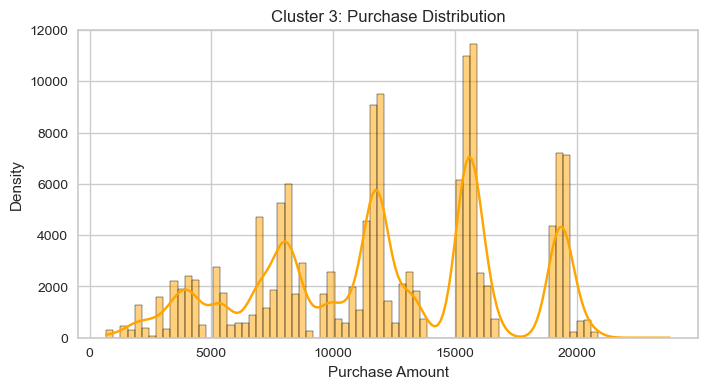


--- Detailed Analysis: Cluster 4 ---
Linear Regression Metrics:
- MAE: 3115.33
- MSE: 18424690.72
- RMSE: 4292.40
- R2 Score: 0.00

Spending Insights:
- Predicted Total Amount Spent: 356,812,303.42
- Actual Total Amount Spent: 357,104,673.00

Product Preferences:
- Category 5: 55204 purchases
- Category 8: 46774 purchases
- Category 11: 10465 purchases


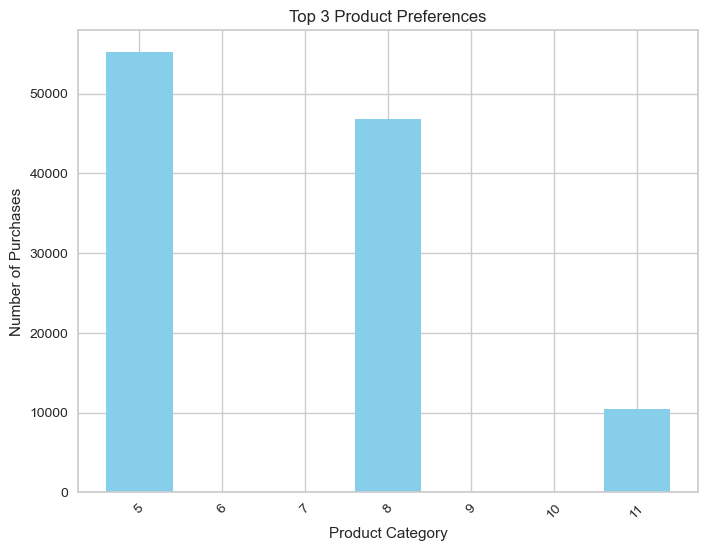


Demographic Distributions:
Age Distribution:
26-35: 48.26%
18-25: 22.91%
36-45: 19.81%
0-17: 3.59%
46-50: 3.53%
51-55: 1.60%
55+: 0.30%

Gender Distribution:
Female: 75.19%
Male: 24.81%

Marital Status Distribution:
Unmarried: 70.75%
Married: 29.25%


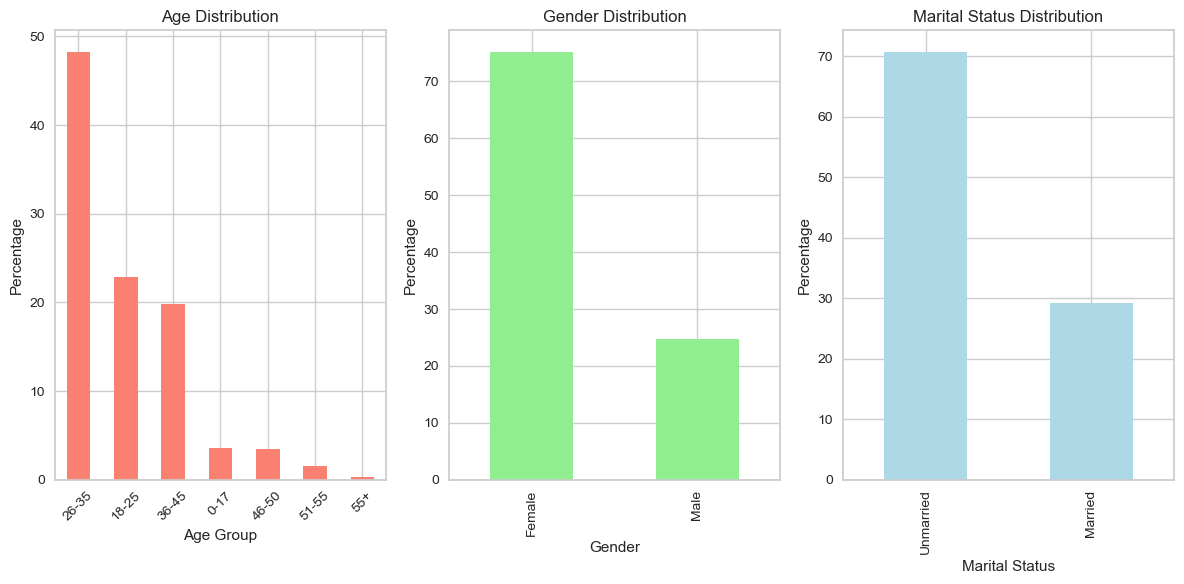

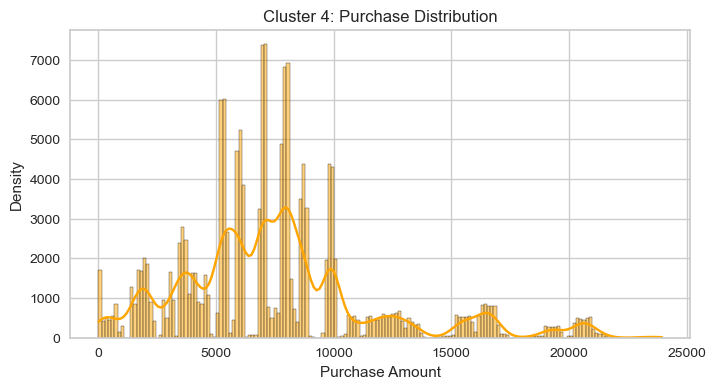

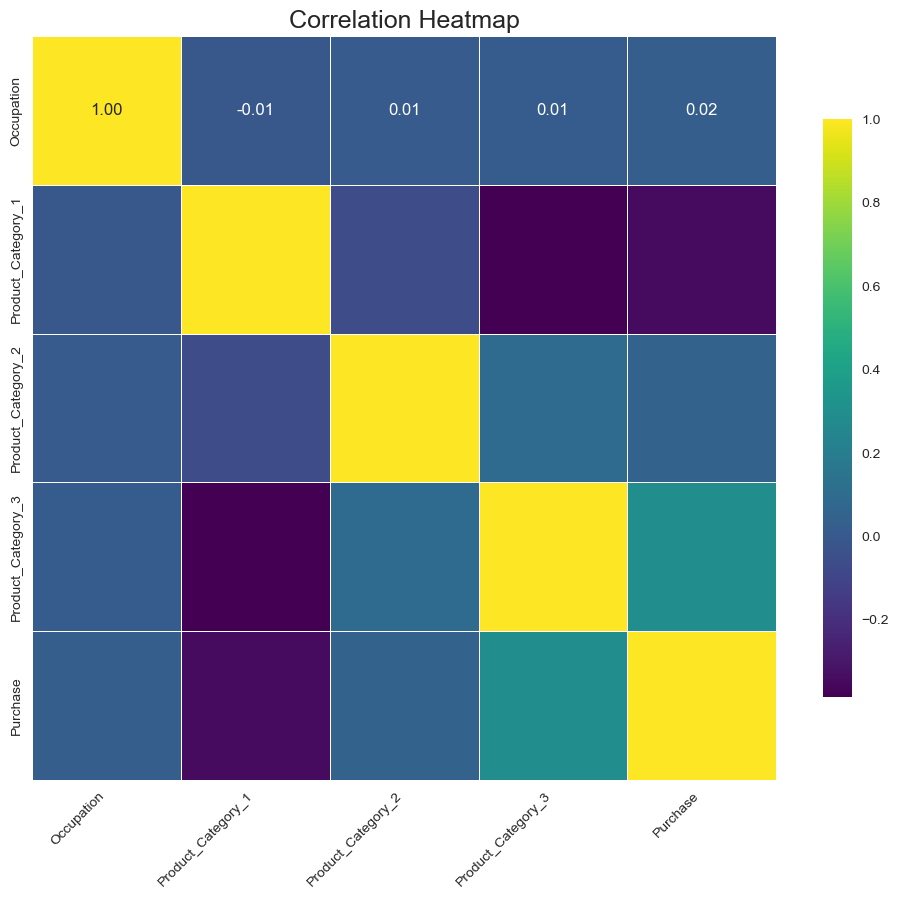

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer
import warnings
warnings.filterwarnings('ignore')

# Load data
# Read the CSV file into a DataFrame
df = pd.read_csv('Assignments_Datasets/train_oSwQCTC (1)/train.csv')
test = pd.read_csv('Assignments_Datasets/test_HujdGe7 (1)/test.csv')

# Preprocessing
df.fillna(0, inplace=True)
test.fillna(0, inplace=True)
df.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)
test.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

# Encoding categorical features
for column in df.select_dtypes(include=['object']).columns:
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    test[column] = encoder.transform(test[column])

# Standardize the data before PCA
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop('Purchase', axis=1))

# Use KElbowVisualizer to determine the optimal number of clusters
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,8), colors='purple')  # Set the color to purple
visualizer.fit(df_scaled)  # Fit the scaled data to the visualizer
visualizer.show()


# Perform PCA
pca = PCA(n_components=5)
train_scores_pca = pca.fit_transform(df_scaled)
test_scores_pca = pca.transform(test)

# Perform clustering using the optimal number of clusters determined by KElbowVisualizer
kmeans_pca = KMeans(init='k-means++', n_clusters=visualizer.elbow_value_, random_state=42)
train_clusters = kmeans_pca.fit_predict(train_scores_pca)
df['K-Means PCA Clusters'] = train_clusters

# Define mappings for encoded categorical variables
age_labels = {0: '0-17', 1: '18-25', 2: '26-35', 3: '36-45', 4: '46-50', 5: '51-55', 6: '55+'}
gender_labels = {0: 'Male', 1: 'Female'}
marital_status_labels = {0: 'Unmarried', 1: 'Married'}

# Map gender and marital status
df['Gender'] = df['Gender'].map(gender_labels)
df['Marital_Status'] = df['Marital_Status'].map(marital_status_labels)

# Linear Regression for each cluster and detailed analysis
for cluster in range(kmeans_pca.n_clusters):
    df_cluster = df[df['K-Means PCA Clusters'] == cluster]
    X = train_scores_pca[df['K-Means PCA Clusters'] == cluster]
    y = df_cluster['Purchase']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
    
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(f"\n--- Detailed Analysis: Cluster {cluster + 1} ---")
    print('Linear Regression Metrics:')
    print(f"- MAE: {metrics.mean_absolute_error(y_test, y_pred):.2f}")
    print(f"- MSE: {metrics.mean_squared_error(y_test, y_pred):.2f}")
    print(f"- RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred)):.2f}")
    print(f"- R2 Score: {metrics.r2_score(y_test, y_pred):.2f}")

    # Spending Insights
    print(f"\nSpending Insights:")
    print(f"- Predicted Total Amount Spent: {y_pred.sum():,.2f}")
    print(f"- Actual Total Amount Spent: {y_test.sum():,.2f}")

    # Product Preferences
    print("\nProduct Preferences:")
    top_products = Counter(df_cluster['Product_Category_1']).most_common(3)
    for prod, count in top_products:
        print(f"- Category {prod}: {count} purchases")

    # Product Preferences
    plt.figure(figsize=(8, 6))
    top_products = Counter(df_cluster['Product_Category_1']).most_common(3)
    product_categories = [prod[0] for prod in top_products]
    purchase_counts = [prod[1] for prod in top_products]
    plt.bar(product_categories, purchase_counts, color='skyblue')
    plt.title('Top 3 Product Preferences')
    plt.xlabel('Product Category')
    plt.ylabel('Number of Purchases')
    plt.xticks(rotation=45)
    plt.show()


    # Demographic Distributions
    print("\nDemographic Distributions:")
    print("Age Distribution:")
    age_dist = df_cluster['Age'].map(age_labels).value_counts(normalize=True) * 100
    for age, percentage in age_dist.items():
        print(f"{age}: {percentage:.2f}%")

    # Demographic Distributions
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 3, 1)
    age_dist = df_cluster['Age'].map(age_labels).value_counts(normalize=True) * 100
    age_dist.plot(kind='bar', color='salmon')
    plt.title('Age Distribution')
    plt.xlabel('Age Group')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)


    print("\nGender Distribution:")
    gender_distribution = df_cluster['Gender'].value_counts(normalize=True) * 100
    for gender, percentage in gender_distribution.items():
        print(f"{gender}: {percentage:.2f}%")
    plt.subplot(1, 3, 2)
    gender_distribution = df_cluster['Gender'].value_counts(normalize=True) * 100
    gender_distribution.plot(kind='bar', color='lightgreen')
    plt.title('Gender Distribution')
    plt.xlabel('Gender')
    plt.ylabel('Percentage')



    print("\nMarital Status Distribution:")
    marital_status_distribution = df_cluster['Marital_Status'].value_counts(normalize=True) * 100
    for status, percentage in marital_status_distribution.items():
        print(f"{status}: {percentage:.2f}%")

    plt.subplot(1, 3, 3)
    marital_status_distribution = df_cluster['Marital_Status'].value_counts(normalize=True) * 100
    marital_status_distribution.plot(kind='bar', color='lightblue')
    plt.title('Marital Status Distribution')
    plt.xlabel('Marital Status')
    plt.ylabel('Percentage')
    plt.tight_layout()
    plt.show()


    # Visualize Purchase Distribution within the cluster
    plt.figure(figsize=(8, 4))
    sns.histplot(df_cluster['Purchase'], kde=True, color='orange', palette='husl')
    plt.title(f'Cluster {cluster + 1}: Purchase Distribution')
    plt.xlabel('Purchase Amount')
    plt.ylabel('Density')
    plt.show()
    


# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=['float64', 'int64']).corr(), annot=True, fmt=".2f", cmap='viridis', square=True, linewidths=.5, cbar_kws={"shrink": .75})
plt.title('Correlation Heatmap', fontsize=18)
plt.xticks(fontsize=10, rotation=45, ha='right')
plt.yticks(fontsize=10)
plt.show()